## Sentiment Analysis on House Rules

#### Setup

In [3]:
import pandas as pd
import os
from textblob import TextBlob
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
cleaned_airbnb_hr_df = pd.read_csv("AirBnB_Open_Data_House_Rules.csv", sep=",",low_memory=False)

TextBlob Function

In [6]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

In [7]:
cleaned_airbnb_hr_df['sentiment'] = cleaned_airbnb_hr_df['house_rules'].apply(get_sentiment)

In [8]:
cleaned_airbnb_hr_df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,sentiment
count,4.693800e+04,4.693800e+04,46938.000000,46938.000000,46938.000000,46938.000000,46938.000000,46938.000000,46938.000000,38312.000000,46938.000000,46938.000000,46938.000000,46938.000000
mean,2.702597e+07,4.923690e+10,40.728643,-73.951559,2012.517406,623.525779,124.485790,7.045784,23.417210,1.344982,3.227832,6.338404,134.275044,0.143702
std,1.822635e+07,2.848719e+10,0.055056,0.046929,5.741616,332.047322,66.562378,34.908266,41.529406,1.642171,1.317419,28.530381,132.520604,0.188442
min,1.001254e+06,1.236005e+08,40.499790,-74.244420,2003.000000,50.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.000000,-0.625000
25%,1.147805e+07,2.472655e+10,40.689663,-73.982630,2008.000000,338.000000,67.000000,1.000000,1.000000,0.190000,2.000000,1.000000,0.000000,0.000000
50%,2.169519e+07,4.907763e+10,40.722810,-73.955230,2012.000000,622.000000,124.000000,2.000000,6.000000,0.680000,3.000000,1.000000,89.000000,0.100000
75%,4.698349e+07,7.388126e+10,40.763230,-73.935590,2018.000000,913.000000,183.000000,5.000000,26.000000,2.000000,4.000000,2.000000,255.750000,0.250000
max,5.736742e+07,9.876097e+10,40.913060,-73.712990,2022.000000,1200.000000,240.000000,5645.000000,629.000000,58.500000,5.000000,327.000000,365.000000,1.000000


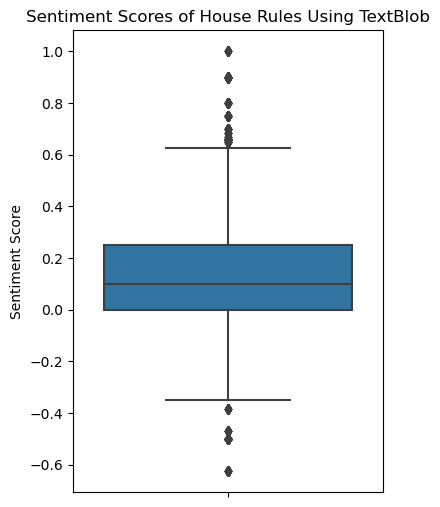

In [9]:
# Create a boxplot of the sentiment column
plt.figure(figsize=(4, 6))
sns.boxplot(y=cleaned_airbnb_hr_df['sentiment'])
plt.title('Sentiment Scores of House Rules Using TextBlob')
plt.ylabel('Sentiment Score')
plt.show()


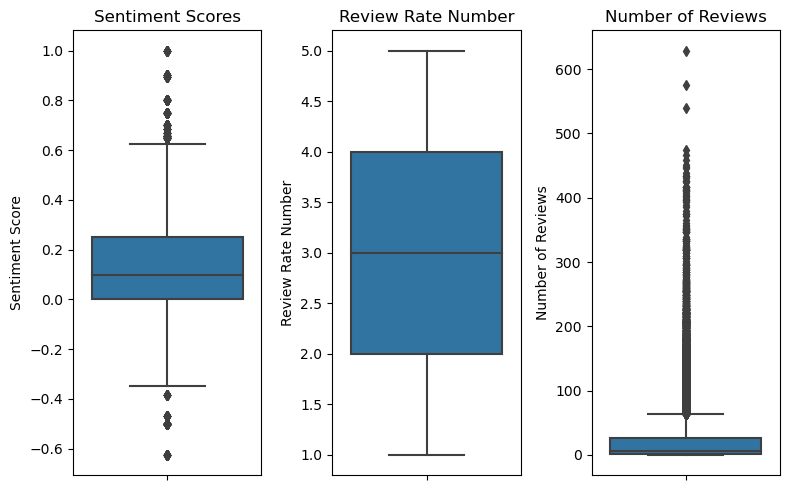

In [25]:
# Create subplots for each variable with different scales
fig, axes = plt.subplots(1, 3, figsize=(8, 5), sharex=False)

# Boxplot for sentiment
sns.boxplot(y=cleaned_airbnb_hr_df['sentiment'], ax=axes[0])
axes[0].set_title('Sentiment Scores')
axes[0].set_ylabel('Sentiment Score')

# Boxplot for review rate number
sns.boxplot(y=cleaned_airbnb_hr_df['review rate number'], ax=axes[1])
axes[1].set_title('Review Rate Number')
axes[1].set_ylabel('Review Rate Number')

# Boxplot for number of reviews
sns.boxplot(y=cleaned_airbnb_hr_df['number of reviews'], ax=axes[2])
axes[2].set_title('Number of Reviews')
axes[2].set_ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

Trying to take the log of number of reviews, see if something else comes up.

In [28]:
cleaned_airbnb_hr_df['log_number_of_reviews'] = np.log1p(cleaned_airbnb_hr_df['number of reviews'])


In [30]:
# Select relevant columns for correlation matrix
correlation_df = cleaned_airbnb_hr_df[['sentiment', 'review rate number', 'log_number_of_reviews']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

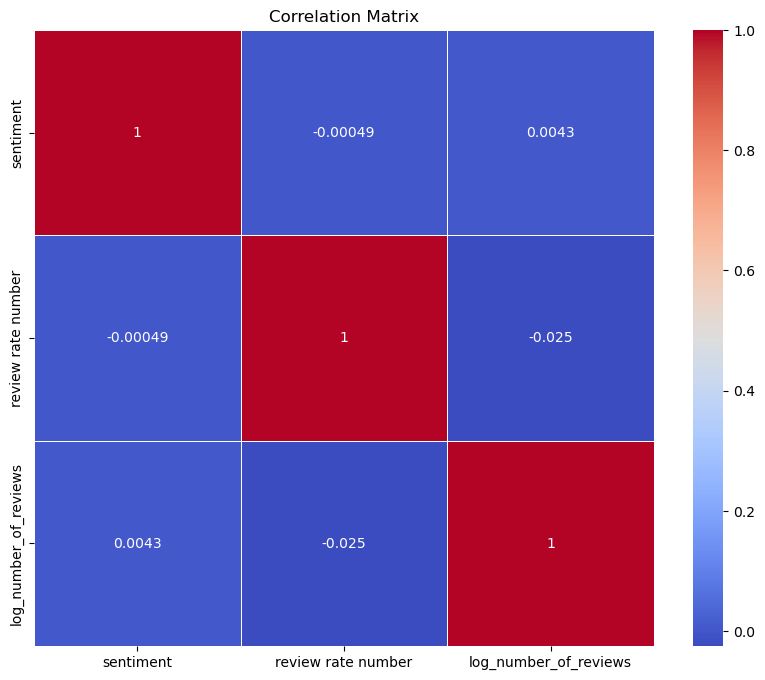

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()